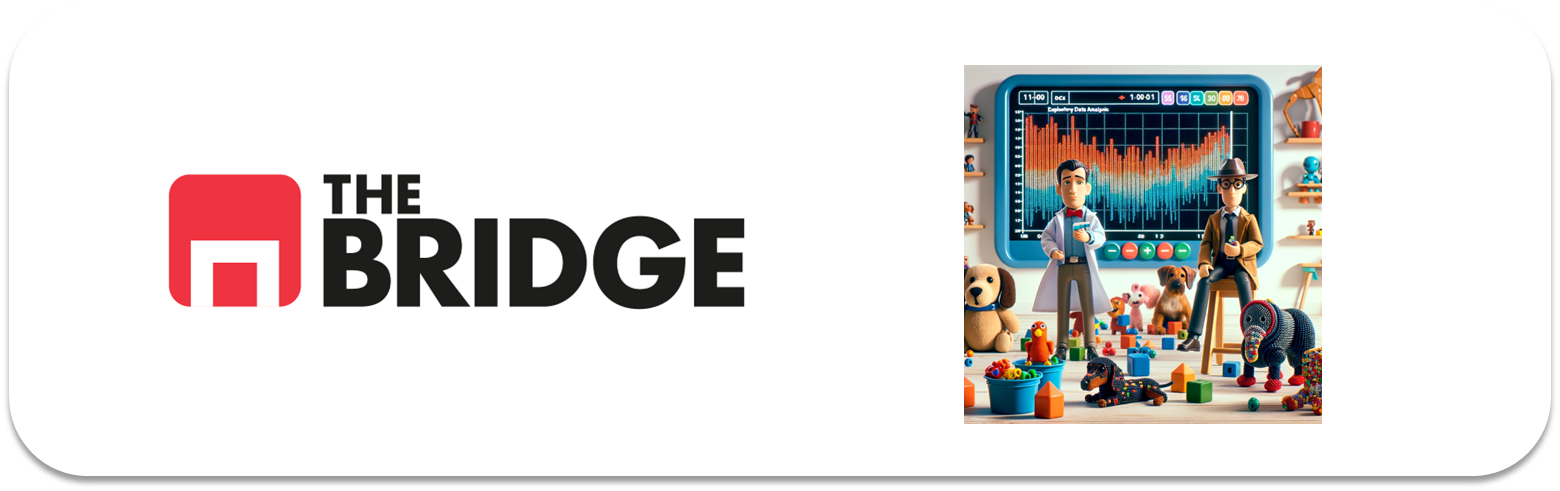

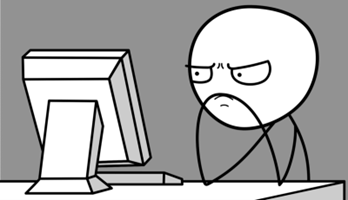

Para ejercitarte y afianzar lo aprendido sobre el estudio estadístico de las relaciones entre variables, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bootcampviztools as booty


### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [3]:
admisDF = pd.read_csv('./data/admission_data.csv')

### Ejercicio 2

Si recuerdas, las variables "Admission" y "Major" parecían tener una relación clara (la distribución de ratio de admisión variaba claramente entre departamentos o "Majors"). Utiliza el estadístico adecuado (para variables categóricas entre sí, Chi-2) para comprobar que esa hipótesis de relación es estadísticamente significativa, tal y como lo hemos hecho en el workout

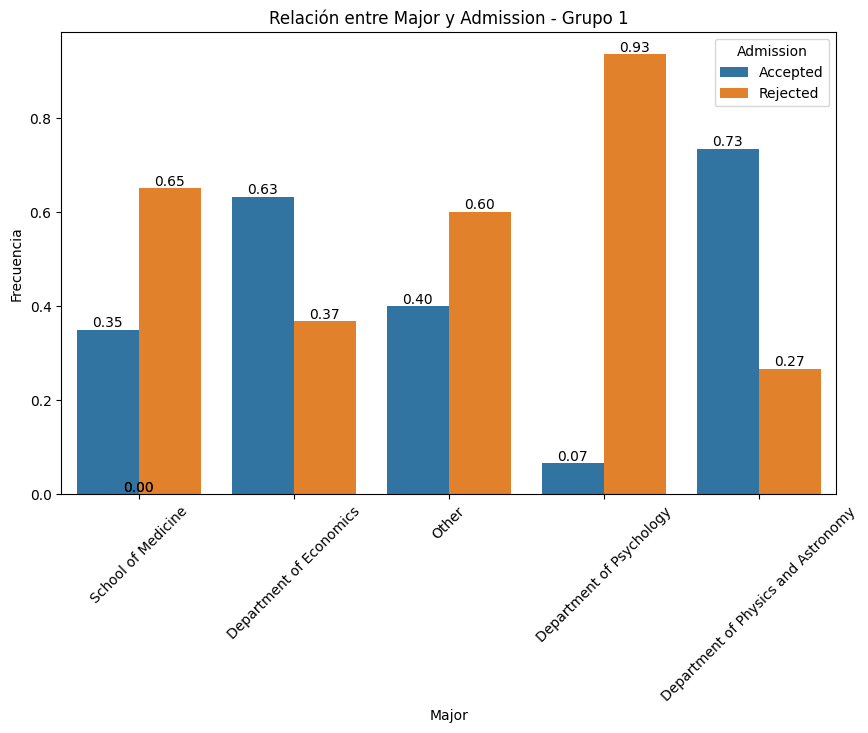

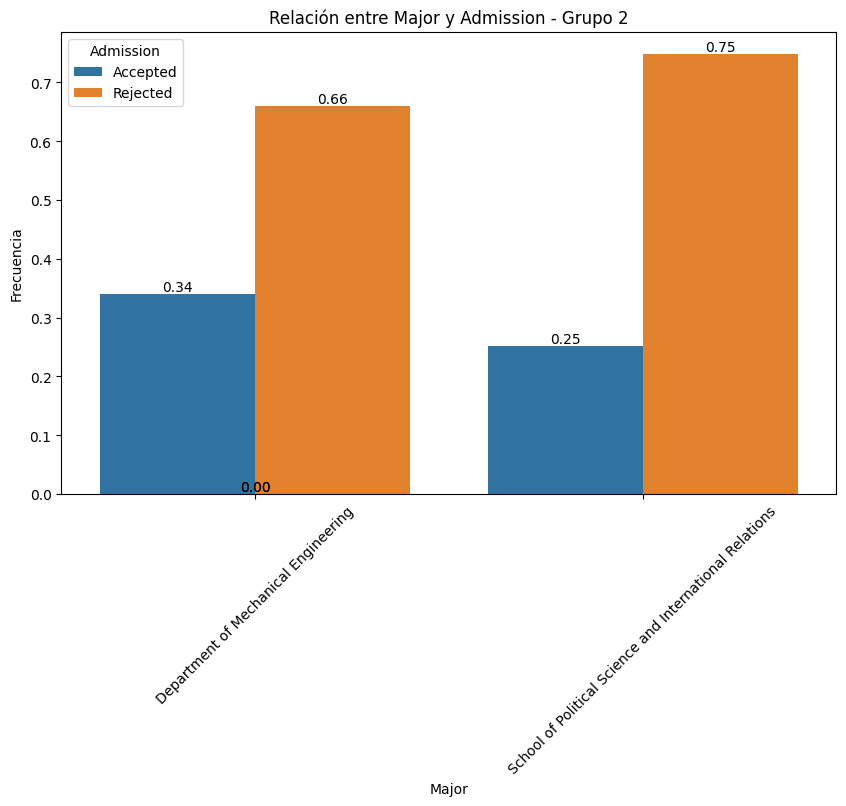

In [6]:
booty.plot_categorical_relationship_fin(admisDF, "Major","Admission", relative_freq=True, show_values=True)

In [7]:
contingency_tab = pd.crosstab(admisDF['Admission'], admisDF['Major'])

In [8]:
contingency_tab

Major,Department of Economics,Department of Mechanical Engineering,Department of Physics and Astronomy,Department of Psychology,Other,School of Medicine,School of Political Science and International Relations
Admission,,,,,,,
Accepted,370,269,914,47,3164,321,147
Rejected,215,523,332,667,4760,597,437


In [9]:
from scipy.stats import chi2_contingency

In [13]:
chi2, p_val, dof, expected = chi2_contingency(contingency_tab)
print("Chi-Sq Value:", chi2)
print("P_Value:", p_val)
print("Degrees of freedom:", dof)
if p_val < 0.05:
    print("There is a statistically significant relationship between departments and admission response")
else:
    print("There is NO statistically significant relationship between departments and admission response")
print()
print("Expected frequencies table: \n", expected)

Chi-Sq Value: 1102.860844398216
P_Value: 5.0157639171790306e-235
Degrees of freedom: 6
There is a statistically significant relationship between departments and admission response

Expected frequencies table: 
 [[ 239.81195644  324.66849487  510.77897046  292.69356734 3248.32468855
   376.32030087  239.40202147]
 [ 345.18804356  467.33150513  735.22102954  421.30643266 4675.67531145
   541.67969913  344.59797853]]


### Ejercicio 3

Repite el ejercicio anterior para las variables "Admission" y "Gender".

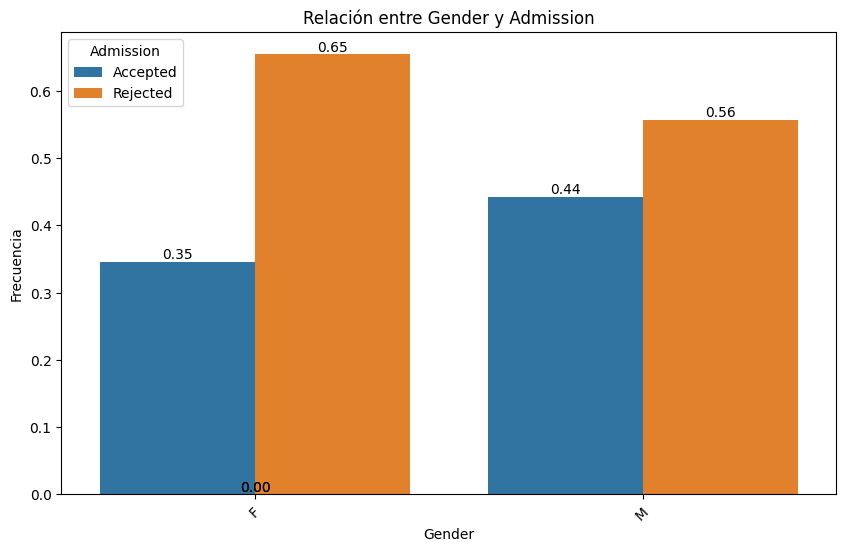

In [15]:
booty.plot_categorical_relationship_fin(admisDF, "Gender","Admission", relative_freq=True, show_values=True)

In [22]:
contingency_tab = pd.crosstab(admisDF['Gender'], admisDF['Admission'])
contingency_tab

Admission,Accepted,Rejected
Gender,,
F,1494,2827
M,3738,4704


In [23]:
chi2, p_val, dof, expected = chi2_contingency(contingency_tab)
print("Chi-Sq Value:", chi2)
print("P_Value:", p_val)
print("Degrees of freedom:", dof)
if p_val < 0.05:
    print("There is a statistically significant relationship between gender and admission response")
else:
    print("There is NO statistically significant relationship between gender and admission response")
print()
print("Expected frequencies table: \n", expected)

Chi-Sq Value: 110.84892145390278
P_Value: 6.385628329926473e-26
Degrees of freedom: 1
There is a statistically significant relationship between gender and admission response

Expected frequencies table: 
 [[1771.32899788 2549.67100212]
 [3460.67100212 4981.32899788]]


### Ejercicio 4

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [29]:
tipsDF = pd.read_csv("./data/tips.csv")
tipsDF.drop(columns='Unnamed: 0', inplace=True)
tipsDF.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Ejercicio 5

Comprueba si la hipótesis "No existe una relación entre la propina dejada y el sexo del cliente" tiene confirmación estadística significativa. Para ello emplea el test que creas conveniente a la relación entre las variables "tip" y "sex"(recuerda que aquí disponemos de tres test: t-student, prueba U de Mann-Whitney u el análisis ANOVA).

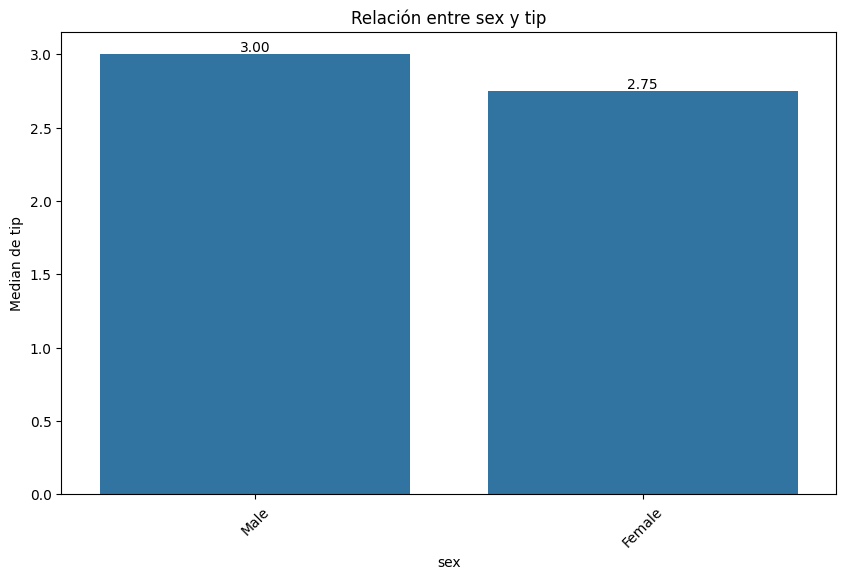

In [34]:
booty.plot_categorical_numerical_relationship(tipsDF, 'sex', 'tip', show_values=True, measure='median')

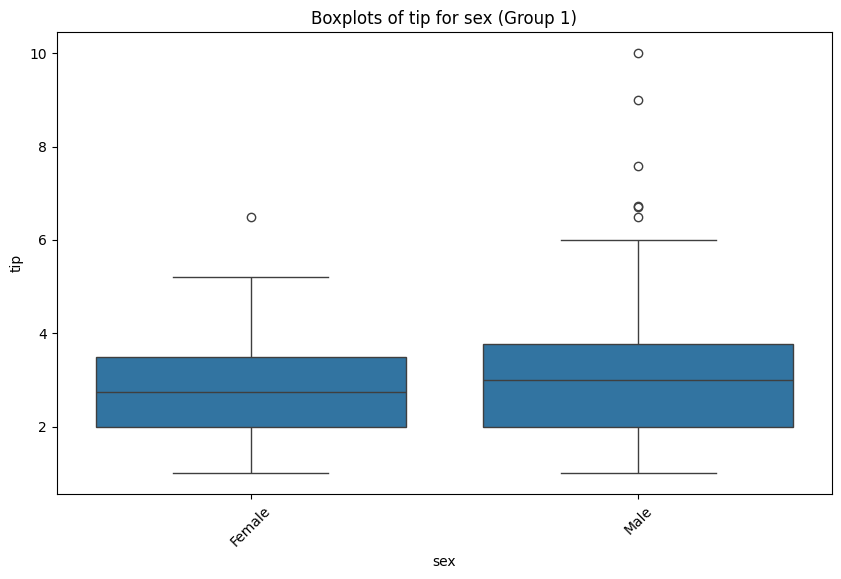

In [35]:
booty.plot_grouped_boxplots(tipsDF, 'sex', 'tip')

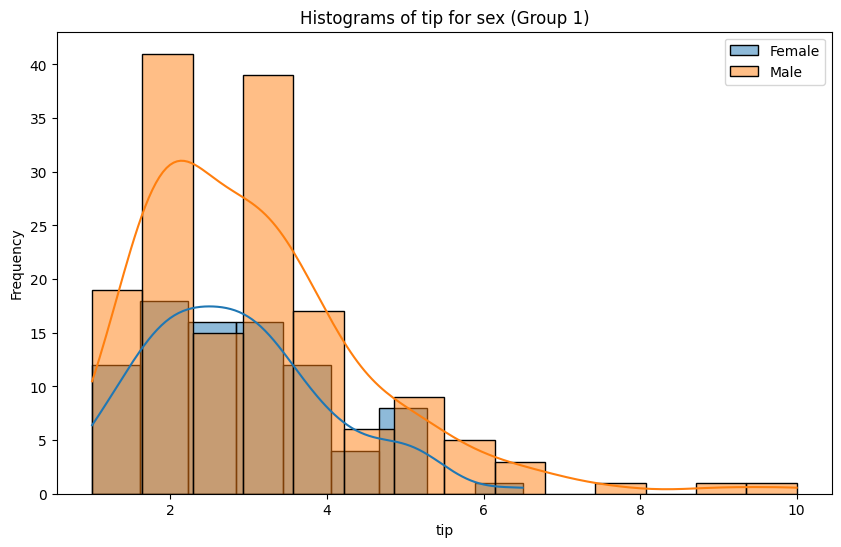

In [36]:
booty.plot_grouped_histograms(tipsDF, 'sex', 'tip', group_size=2)

In [37]:
from scipy.stats import mannwhitneyu

In [38]:
female_tips = tipsDF[tipsDF['sex'] == 'Female']['tip']
male_tips = tipsDF[tipsDF['sex'] == 'Male']['tip']

In [40]:
u_stat, p_val = mannwhitneyu(female_tips, male_tips,alternative='two-sided')

print(f'U-stat: {u_stat:.4f}')
print(f'P-val: {p_val:.4f}')

if p_val < 0.05:
    print('The difference tips between males and females is statistically significant')
else:
    print('The difference tips between males and females is NOT statistically significant')


U-stat: 6369.5000
P-val: 0.3834
The difference tips between males and females is NOT statistically significant


### Ejercicio 6

Repite el ejercicio anterior para "tip" y "size" considerando esta última como "categórica". Haz el analisis bivariante visual previo.

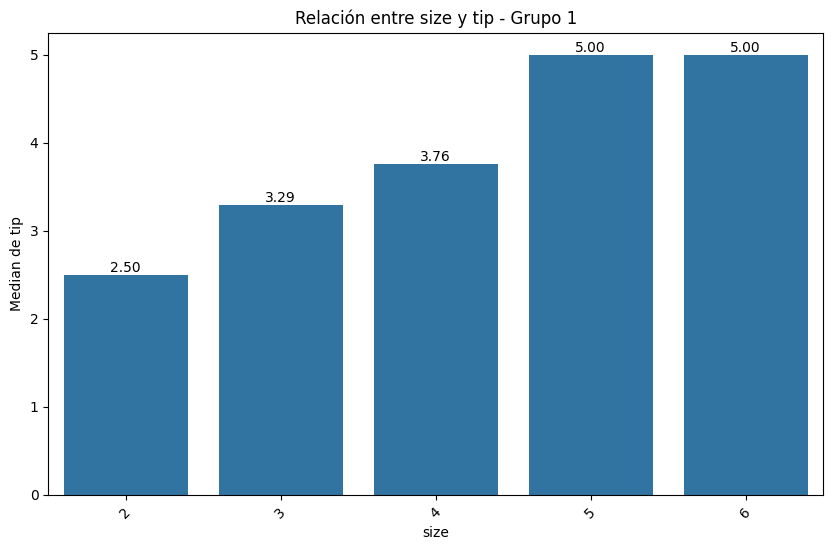

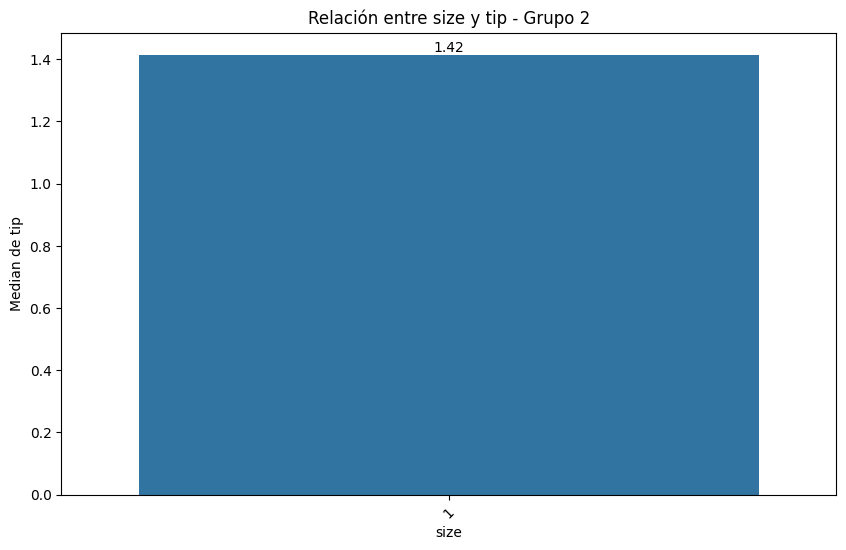

In [43]:
booty.plot_categorical_numerical_relationship(tipsDF, 'size', 'tip', show_values=True, measure='median')

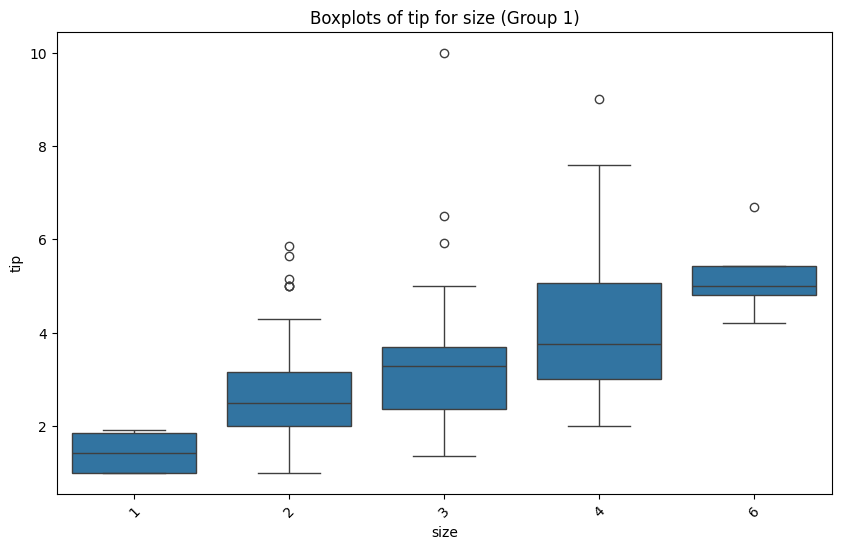

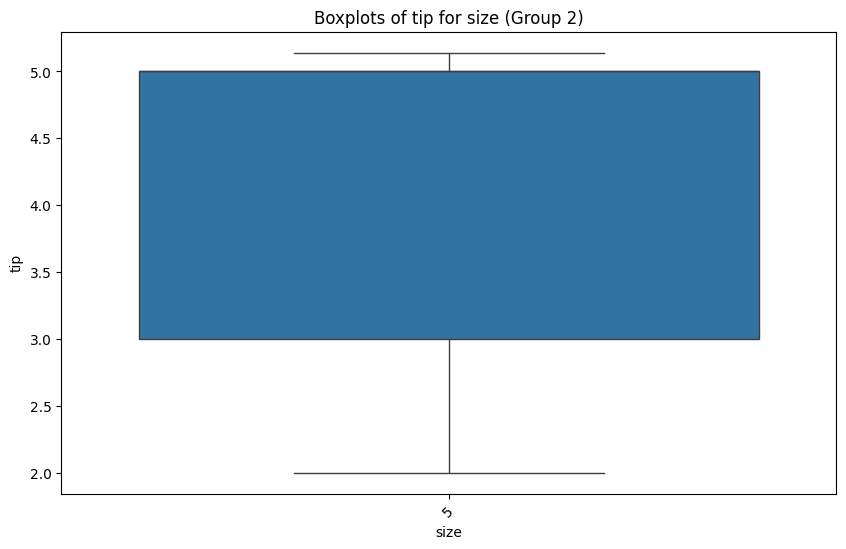

In [44]:
booty.plot_grouped_boxplots(tipsDF, 'size', 'tip')

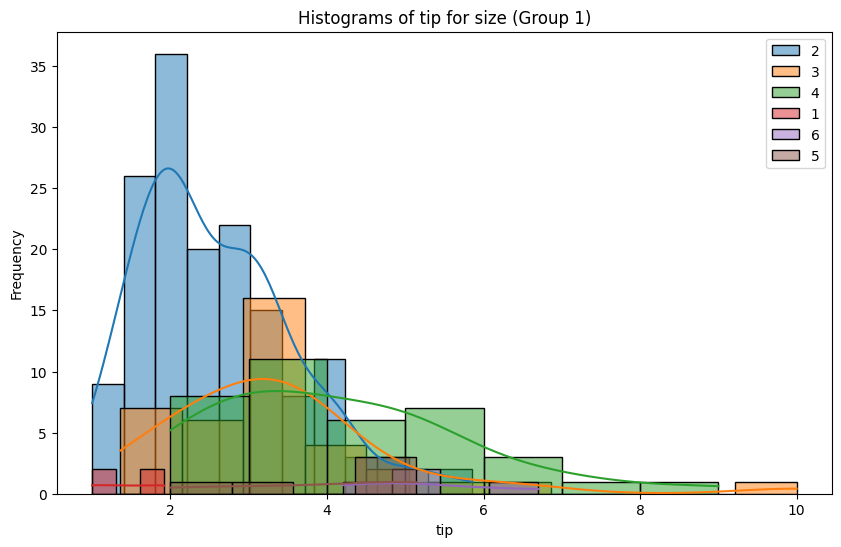

In [45]:
booty.plot_grouped_histograms(tipsDF, 'size', 'tip', group_size=7)

In [46]:
from scipy.stats import f_oneway

In [48]:
groups = tipsDF['size'].unique()
sizes_by_tip = [tipsDF[tipsDF['size'] == group]['tip'] for group in groups]

6

In [50]:
f_stat, p_val = f_oneway(*sizes_by_tip)
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_val}")

if p_val < 0.05:
    print("There is a significant difference in tips between group sizes")
else:
    print("There is NO significant difference in tips between group sizes")


F-Statistic: 15.7463
P-Value: 2.1694633916208174e-13
There is a significant difference in tips between group sizes


### Ejercicio 7

Considera ahora "size" como numérica, muestra el diagrama de dispersión con correlación entre "size" y "tip" y luego aplicales el test para saber si el coeficiente de pearson es estadísticamente significativo. ¿Qué más observas?

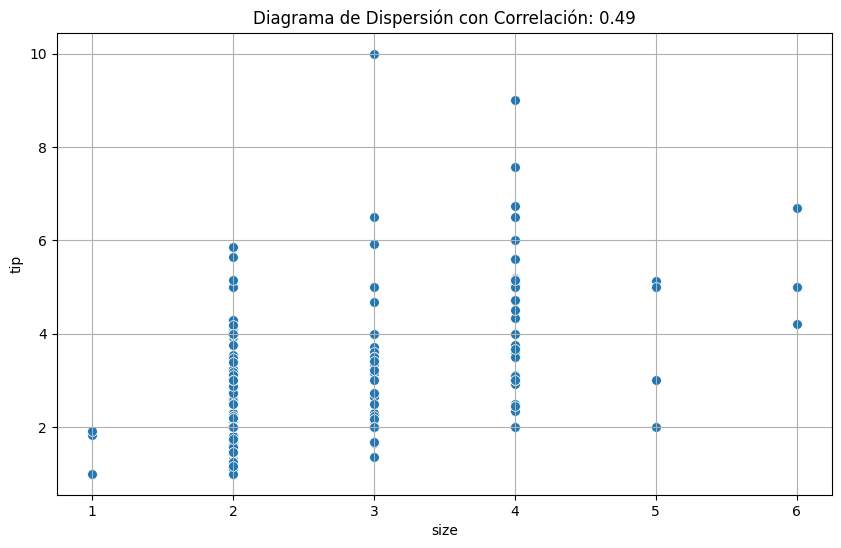

In [52]:
booty.grafico_dispersion_con_correlacion(tipsDF, 'size','tip', mostrar_correlacion=True)

In [58]:
from scipy.stats import pearsonr

stat, p_val = pearsonr(tipsDF["size"], tipsDF["tip"], alternative= "less")

In [61]:
print(f"Pearson correlation stat: {stat}")
print(f"P_value: {p_val}")

if p_val < 0.05:
    print("Statistically significant result!")
else:
    print("NO statistically significant result!")


Pearson correlation stat: 0.48929877523035725
P_value: 0.9999999999999998
NO statistically significant result!
